# Các nội dung chính
1. Mục tiêu:
*   Nắm được các bước cơ bản trong khâu tiền xử lí dữ liệu.


2. Dữ liệu: 
* Dữ liệu bất động sản - *Bengaluru_House_Data*
> Gồm các trường dữ liệu: location, size, total_sqft, price, ...


> Link Kaggle: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data




3. Yêu cầu:
* Sử dụng các công cụ (Pandas, Seaborn, ...) để thực hiện xem xét, đánh giá đặc điểm của dữ liệu, từ đó đưa ra phương án tiền xử lí dữ liệu (làm sạch, trích xuất thông tin ban đầu, ...)




# Nội dung thực hành

In [5]:
#Nếu chạy trên Google Colab thì cần kết nối với máy chủ trước
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd #Giúp làm việc với các dữ liệu dạng bảng
import matplotlib.pyplot as plt #Thư viện hỗ trợ trực quan hóa dữ liệu
import seaborn as sns #Thư viện giúp trực quan hóa dữ liệu, được xây trên matplotlib

### Load dataset 

1. Đọc dữ liệu bằng pandas, dạng dataframe

In [ ]:
%cd /content/drive/MyDrive/Preprocessing_practice/1.Practice/Bangalore_House_Price_data
# Nếu chạy trên colab thì cũng cần trỏ tới thư mục phù hợp để lấy data
# cd DIR_PATH

In [ ]:
path = "Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)
df_raw.shape

2. Review 5 sample đầu tiên

In [ ]:
df_raw.head() # return DataFrame

3. Review 5 sample cuối cùng

In [ ]:
df_raw.tail()

### Exploratory Data Analysis (EDA)

In [ ]:
df = df_raw.copy() #Tạo bản sao để thực hiện EDA

1. Thông tin cơ bản về dữ liệu, tên trường, số giá trị non-null của từng trường, kiểu dữ liệu của từng trường

In [ ]:
df.info()

2. Thống kê 1 số thuộc tính cơ bản của dữ liệu, bao gồm count, mean, std, min, max, quartile

In [ ]:
df.describe()

3. Thống kê các giá trị duy nhất của từng trường và số lần xuất hiện của chúng

In [ ]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

value_count(df)

4. Xem xét tương quan về giá trị của các cặp trường số

In [ ]:
sns.pairplot(df)

In [ ]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [ ]:
# num_vars = ["bath", "balcony", "price"]
sns.heatmap(df.corr(),cmap="coolwarm", annot=True)

### Preare Data for Machine Learning Model

#### Data cleaning

1. Thống kê số lượng và tỉ lệ giá trị null của từng thuộc tính

In [ ]:
df.isnull().sum() #So luong gia tri null cua tung thuoc tinh

In [ ]:
df.isnull().mean()*100  # Tỷ lệ giá trị null của từng thuộc tính

2. Loại đi trường society vì tỉ lệ null cao (41%)

In [ ]:
df2 = df.drop('society', axis='columns')
df2.shape

3. Thay thế giá trị null trong trường balcony bằng giá trị trung bình của các giá trị not null

In [ ]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

4. Xóa đi các điểm dữ liệu (hàng) có giá trị nan (không có giá trị)

In [ ]:
df3 = df2.dropna()
df3.shape

In [ ]:
df3.isnull().sum() #Thống kê lại xem đã xử lí hết các dữ liệu null hay chưa?

#### Feature Engineering

In [ ]:
#Cho phép in ra toàn bộ các giá trị output có thể của câu lệnh
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

1. Converting 'total_sqft' cat feature in numeric

In [ ]:
df3['total_sqft'].value_counts()

2. Chuyển trường total_sqft thành kiểu float

In [ ]:
total_sqft_float = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_float.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_float.append((float(temp[0])+float(temp[-1]))/2) 
    except:
      total_sqft_float.append(np.nan)

In [ ]:
df4 = df3.reset_index(drop=True)

3. Thêm trường total_sqft kiểu float

In [ ]:
df5 = df4.join(pd.DataFrame({'total_sqft_float':total_sqft_float}))
df5.head() #Quan sát kết quả sau khi xử lí

6. Thông tin về số điểm dữ liệu null của từng trường

In [ ]:
df5.isnull().sum()

7. Bỏ đi các điểm dữ liệu (hàng) có giá trị null

In [ ]:
df6 = df5.dropna()
df6.shape

8. Xem lại thông tin của dataframe 

In [ ]:
df6.info()

9. Làm việc với feature: *size*

In [ ]:
# Quan sát sự phân bố giá trị của trường 'size' với value_counts
df6['size'].value_counts()

In [ ]:
#Chuyển thuộc tính số phòng từ dạng category về dạng numeric
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [ ]:
#Đánh lại index cho các hàng theo dãy số tự nhiên liên tiếp
df6 = df6.reset_index(drop=True) 

In [ ]:
# Thêm trường dữ liệu số phòng (bhk)
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

In [ ]:
#In ra kết quả thực hiện các thao tác kể trên?
df7.tail()

10. Finding Outlier and Removing
* Dựa trên biểu đồ boxplot vừa thực hiện ở trên/ hoặc công cụ khác để phát hiện và loại bỏ các điểm ngoại lai:

In [ ]:
# Xem xét trường diện tích:
sns.boxplot(x = df7['total_sqft_float'])

In [ ]:
# Chọn ngưỡng diện tích là 350 để xem xét
df7[df7['total_sqft_float']/df7['bhk'] < 350].head()

In [ ]:
# Loại bỏ đi các điểm dữ liệu có diện tích phòng trung bình >= 350
df8 = df7[~(df7['total_sqft_float']/df7['bhk'] < 350)]
df8.shape

In [ ]:
# Tạo thêm trường dữ liệu price_per_sqft (giá/ diện tích feet vuông)
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_float']  
df8.head()

In [ ]:
df8.price_per_sqft.describe()

# Bài tập bổ sung (homework)

> Phần bài tập này là các câu hỏi  mở rộng, làm tiếp theo bài toán ở trên. Học viên cần viết mã để thực hiện các yêu cầu dưới đây:

Bài tập 0: Sử dụng sns.boxplot() để quan sát đặc điểm phân bố dữ liệu của các trường số, mỗi trường này có outlier ko?

In [ ]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu và phát hiện ngoại lai của từng trường dữ liệu trong vars
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))

#Code ở đây

Bài tập 1: Viết hàm bỏ đi các điểm dữ liệu có price per sqft dựa trên mean, std của các ngôi nhà dựa trên từng vị trí

> Gợi ý: Xét trên từng vị trí (location), ngôi nhà thỏa mãn phải có $price\_per\_sqft \in [mean - std, mean + std]$

In [ ]:
def remove_pps_outliers(df):
  #Code ở đây
#--------
df9 = remove_pps_outliers(df8)
df9.shape

Bài tập 2: Loại bỏ outlier xét theo trường bkh (số phòng)

Xét theo từng khu vực địa lí và theo từng loại nhà với số lượng phòng khác nhau, có một số ngôi nhà có giá không hợp lí (outliers), hãy tìm cách loại bỏ các outlier này. Cần ghi rõ quy tắc ghi nhận outlier

In [ ]:
def remove_bhk_outliers(df):
  # Code ở đây

df10 = remove_bhk_outliers(df9)
df10.shape

Bài tập 3: Loại bỏ outlier khi xét trường 'bathroom'

In [ ]:
df10.bath.unique() #Có thể quan sát thấý một số căn nhà có số phòng tắm quá lớn (VD: 12!!!)

In [ ]:
df10[df10.bath > df10.bhk+2]

In [ ]:
df11 = #Code ở đây, sao cho: df10[df10.bath < df10.bhk+2]
df11.shape

In [ ]:
df11.head()

In [ ]:
# Quan sát lại kết quả sau khi xử lí với boxplot

# (Dùng lại hàm đã code bên trên)

Bài tập 4: Xem xét bỏ đi các trường không cần thiết

Gợi ý: bỏ đi ['area_type', 'availability',"location","size","total_sqft"]

In [ ]:
df12 = #Code ở đây
df12.head()

In [ ]:
#Lưu kết quả xử lí cuối cùng:

df12.to_csv("clean_data.csv", index=False)

Bài tập 5*: Viết hàm trực quan hóa thể hiện mối tương quan giữa tổng diện tích (total_sqft) và giá nhà (price) theo từng vị trí địa lí (location) (tùy chọn minh họa theo 2 vị trí nào đó), của những căn nhà có 2 hoặc 3 phòng. Và cần phân biệt rõ điểm dữ liệu nào tương ứng với nhà có 2 phòng, điểm nào tương ứng với nhà có 3 phòng?

Gợi ý: Kết quả tương tự như hình dưới/ hoặc biểu đồ khác có ý nghĩa tương đương

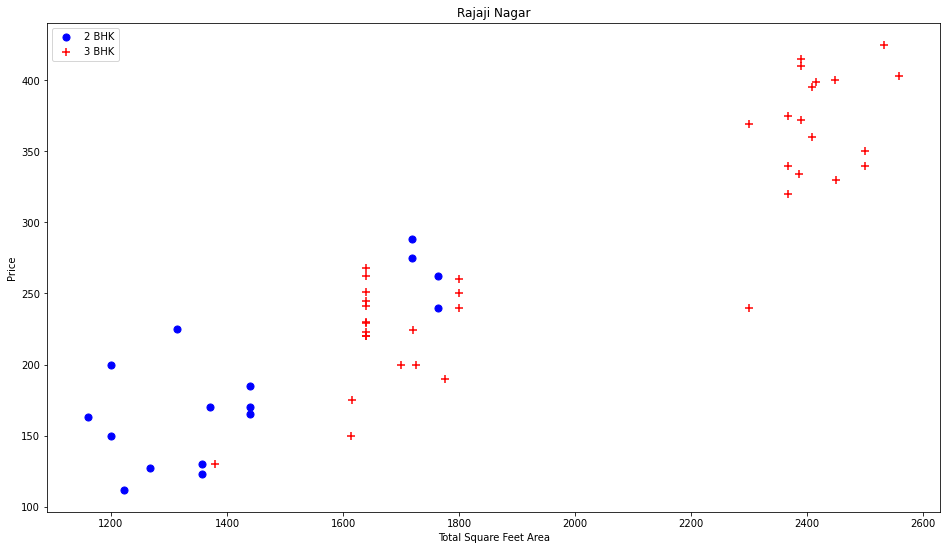

In [ ]:
#Gợi ý: Sử dụng plt.scatter() .... hoạc câu lệnh khác tương đương. Làm với df9

def plot_scatter_chart(df,location):
  #Viết code ở đây

plot_scatter_chart(df9, "Rajaji Nagar")

In [ ]:
plot_scatter_chart(df9, "Hebbal")

Bài tập 6*: Thực hiện các câu lệnh để trả lời các câu hỏi dưới đây:

* Thống kê giá nhà theo từng loại khu vực (area_type). Làm với df9:
* xem xét theo từng khu vực, thì giá nhà trung bình (price_per_sqft) là bao nhiêu, tương quan về giá nhà trung bình giữa các khu vực

* Gợi ý: Phần này có thể đưa ra kết quả dạng bảng hoặc biểu đồ (cột, histogram, ...). 
 - Sử dụng các lệnh: df.groupby(), df.sortvalues(), ... để trích xuất giá trị
 - Sử dụng matplotlib: plt.bar(), ...


In [ ]:
# Code ở đây

In [ ]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu và phát hiện ngoại lai của từng trường dữ liệu
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))
for i,var in enumerate(vars):
  plt.subplot(3,2,i+1)
  sns.boxplot(df8[var])